# EDA

In [43]:
!pip install pandas

In [186]:
import pandas as pd
import numpy as np
import statistics

In [230]:
df = pd.read_csv('datasets/adult.csv', na_values='?')

In [231]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


- workclass, occupation have NaN vals
- capital.gain seems odd

In [232]:
df.shape

(32561, 15)

In [233]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

Duplicate Rows

In [234]:
df[df.duplicated()]

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
8453,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
8645,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
12202,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K
14346,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K
15603,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,<=50K
17344,21,Private,243368,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,50,Mexico,<=50K
19067,46,Private,173243,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
20388,30,Private,144593,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,NaN,<=50K
20507,19,Private,97261,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,United-States,<=50K
22783,19,Private,138153,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,10,United-States,<=50K


In [235]:
df.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

- workclass - 1836 missing values
- occupation - 1843 mv
- native.country - 583 mv

In [236]:
df.isna().sum().sum()

np.int64(4262)

- total - 4262 missing values

- missing values need to be imputed with the appropriate mean, median or mode based on the variable type:
    - workclass - object -> mode
    - occupation - object -> mode
    - native.country - object -> mode

In [237]:
mode_val_work_class = statistics.mode(df['workclass'])
mode_val_work_class
df['workclass'].fillna(mode_val_work_class, inplace=True)

C:\Users\sushi\AppData\Local\Temp\ipykernel_19072\1941085914.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['workclass'].fillna(mode_val_work_class, inplace=True)


In [238]:
df.isna().sum()

age                  0
workclass            0
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [239]:
mode_val_occuptaion = statistics.mode(df['occupation'])
mode_val_occuptaion
df['occupation'].fillna(mode_val_occuptaion, inplace=True)

C:\Users\sushi\AppData\Local\Temp\ipykernel_19072\2693580144.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['occupation'].fillna(mode_val_occuptaion, inplace=True)


In [240]:
mode_val_country = statistics.mode(df['native.country'])
mode_val_country
df['native.country'].fillna(mode_val_country, inplace=True)

C:\Users\sushi\AppData\Local\Temp\ipykernel_19072\3822475237.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['native.country'].fillna(mode_val_country, inplace=True)


In [241]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [242]:
round(df.isna().sum().sum()/df.size * 100, 1)

np.float64(0.0)

In [243]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [244]:
df.describe(include='object')

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,24532,10501,14976,5983,13193,27816,21790,29753,24720


In [245]:
cat_col = []
for col in df.columns:
    if df[col].dtype == 'object':
        cat_col.append(col)

- categorical columns

In [246]:
cat_col

['workclass',
 'education',
 'marital.status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native.country',
 'income']

In [247]:
for col in cat_col:
    categories = df.groupby(col).size()
    print(categories)

workclass
Federal-gov           960
Local-gov            2093
Never-worked            7
Private             24532
Self-emp-inc         1116
Self-emp-not-inc     2541
State-gov            1298
Without-pay            14
dtype: int64
education
10th              933
11th             1175
12th              433
1st-4th           168
5th-6th           333
7th-8th           646
9th               514
Assoc-acdm       1067
Assoc-voc        1382
Bachelors        5355
Doctorate         413
HS-grad         10501
Masters          1723
Preschool          51
Prof-school       576
Some-college     7291
dtype: int64
marital.status
Divorced                  4443
Married-AF-spouse           23
Married-civ-spouse       14976
Married-spouse-absent      418
Never-married            10683
Separated                 1025
Widowed                    993
dtype: int64
occupation
Adm-clerical         3770
Armed-Forces            9
Craft-repair         4099
Exec-managerial      4066
Farming-fishing       994
Handlers

Some general median values for numerical columns

In [248]:
for col in df.columns:
    if df[col].dtype != 'object':
        print(f'{col}: {statistics.median(df[col])}')

age: 37
fnlwgt: 178356
education.num: 10
capital.gain: 0
capital.loss: 0
hours.per.week: 40


In [249]:
for col in df.columns:
    if df[col].dtype != 'object':
        print(f'{col}: {statistics.mean(df[col])}')

age: 38.58164675532078
fnlwgt: 189778.36651208502
education.num: 10.0806793403151
capital.gain: 1077.6488437087312
capital.loss: 87.303829734959
hours.per.week: 40.437455852092995


# Visualization

In [250]:
import seaborn as sns
import matplotlib.pyplot as plt

In [251]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [252]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

In [253]:
num_col = []
for col in df.columns:
    if df[col].dtype != 'object':
        num_col.append(col)

- numerical columns

### Workclass Plot - Bar

<Axes: xlabel='workclass'>

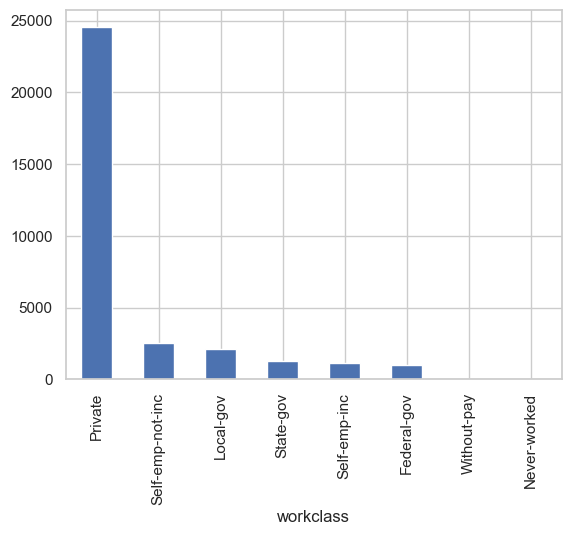

In [254]:
df['workclass'].value_counts().plot(kind='bar')

### Age plot - Bar

(array([2410., 3160., 2461., 3429., 3465., 2583., 3198., 2965., 1828.,
        2139., 1558., 1033.,  996.,  599.,  269.,  227.,  120.,   54.,
          20.,   47.]),
 array([17.  , 20.65, 24.3 , 27.95, 31.6 , 35.25, 38.9 , 42.55, 46.2 ,
        49.85, 53.5 , 57.15, 60.8 , 64.45, 68.1 , 71.75, 75.4 , 79.05,
        82.7 , 86.35, 90.  ]),
 <BarContainer object of 20 artists>)

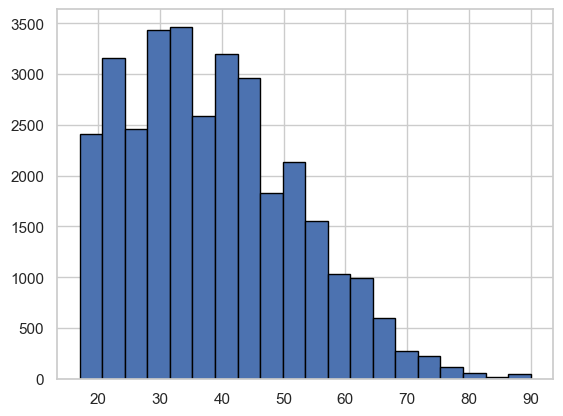

In [255]:
plt.hist(df['age'], bins=20, edgecolor='black')

### Age vs Hour per week plot - Scatter

<Axes: xlabel='age', ylabel='hours.per.week'>

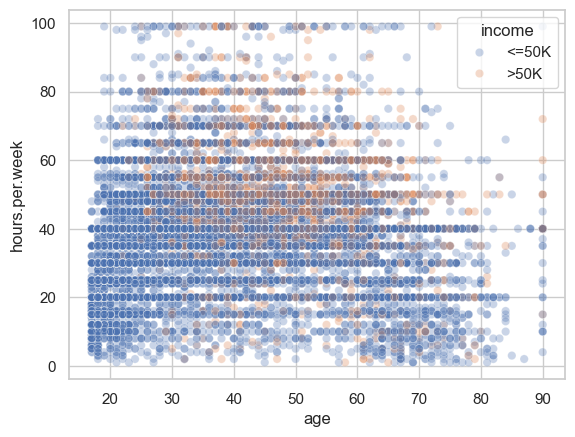

In [256]:
sns.scatterplot(data=df, x='age', y='hours.per.week', hue='income', alpha=0.3)

### Count of male and female - Bar

<Axes: xlabel='sex'>

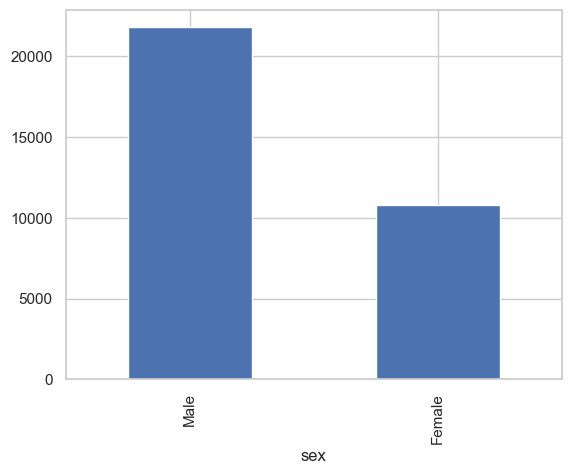

In [257]:
df['sex'].value_counts().plot(kind='bar')

### Education plot - Bar

<Axes: xlabel='education'>

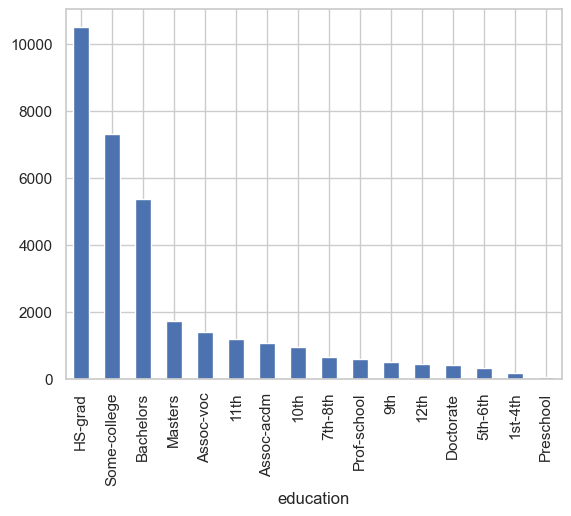

In [258]:
df['education'].value_counts().plot(kind='bar')

### Age Distribution by Income - Box

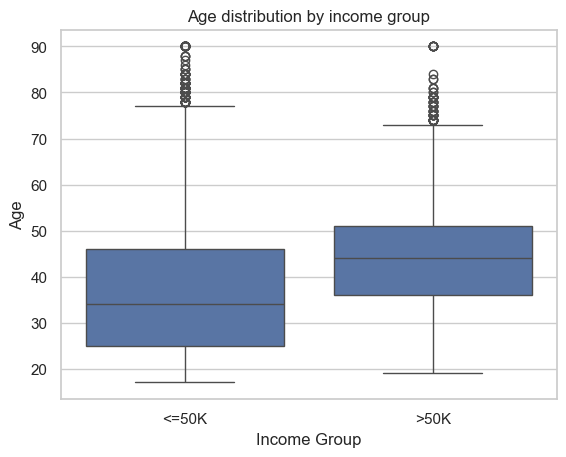

In [259]:
sns.boxplot(data=df, x='income', y='age')
plt.title('Age distribution by income group')
plt.xlabel('Income Group')
plt.ylabel('Age')
plt.show()

In [260]:
average_age = df.groupby('native.country')['age'].mean().reset_index()

Average age of people in each country

In [261]:
pd.DataFrame(average_age).sort_values(by='age', ascending=False)

,native.country,age
17,Hungary,49.384615
21,Italy,46.424658
11,Greece,46.206897
4,Cuba,45.768421
30,Poland,43.116667
1,Canada,42.545455
2,China,42.533333
37,Trinadad&Tobago,41.315789
8,England,41.155556
32,Puerto-Rico,40.508772


### Income vs Sex - Bar

Text(0.5, 1.0, 'Stacked Bar Chart: Income vs. Sex')

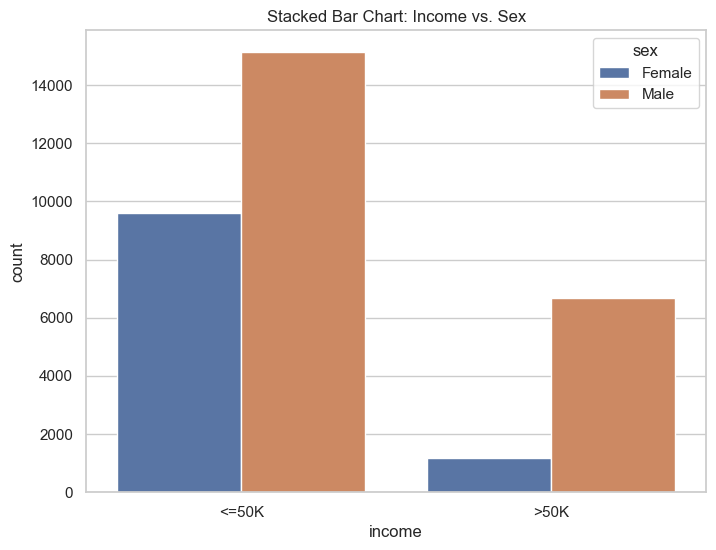

In [262]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='income', hue='sex', dodge=True)
plt.title('Stacked Bar Chart: Income vs. Sex')

In [263]:
pivot_table = pd.crosstab(index=df['income'], columns=df['sex'])
pivot_table

sex,Female,Male
income,,
<=50K,9592,15128
>50K,1179,6662


### Income vs Sex - Heapmap

Text(0.5, 1.0, 'Income vs. Sex')

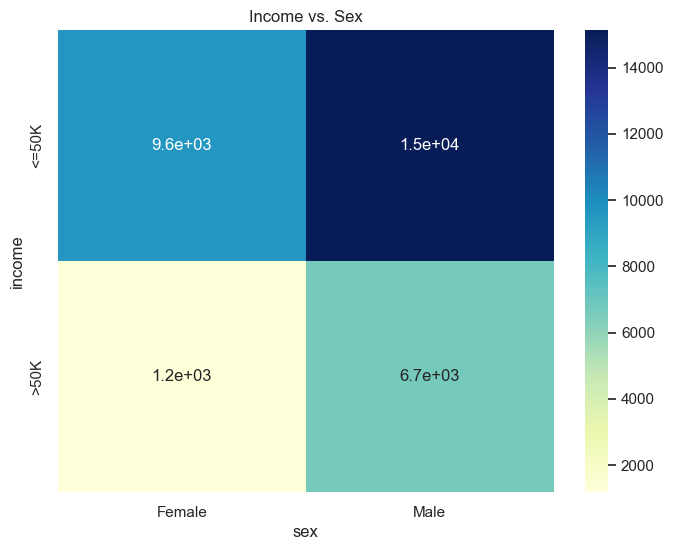

In [264]:
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', cbar=True)
plt.title('Income vs. Sex')

### Correlation Matrix - Heatmap

In [265]:
corr = df[num_col].corr()

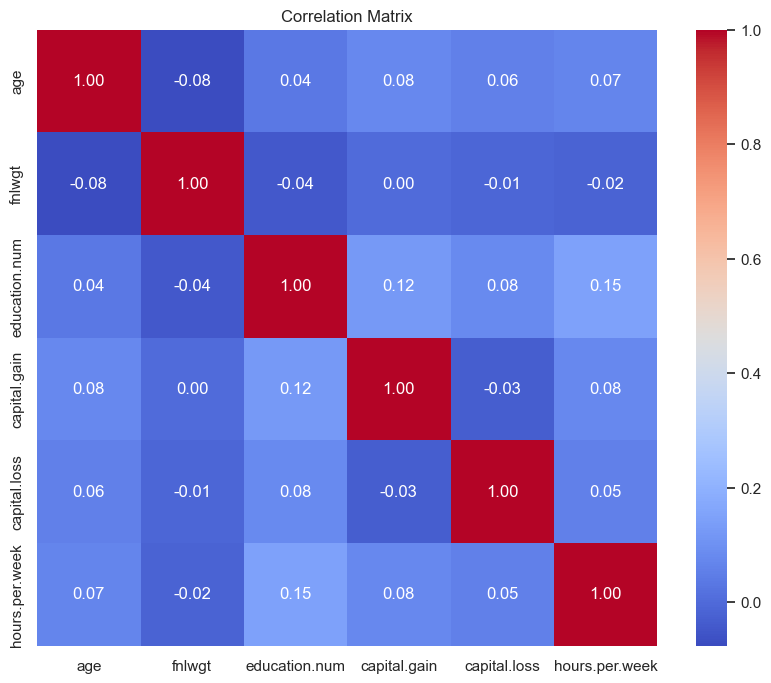

In [266]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix")
plt.show()

# Outlier Handling

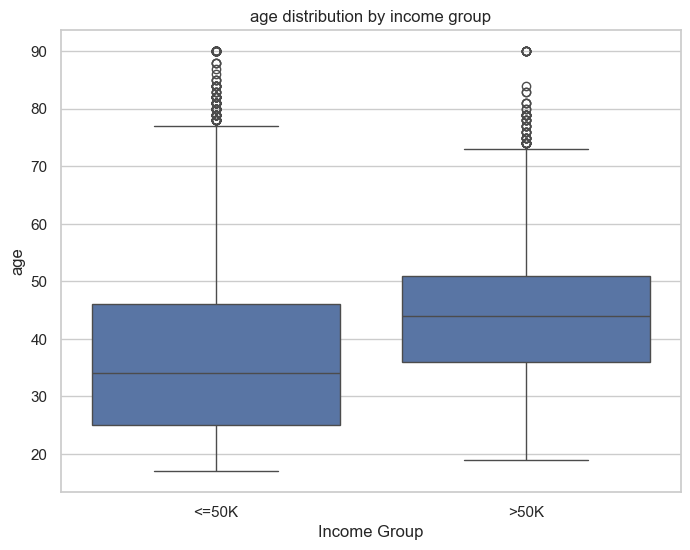

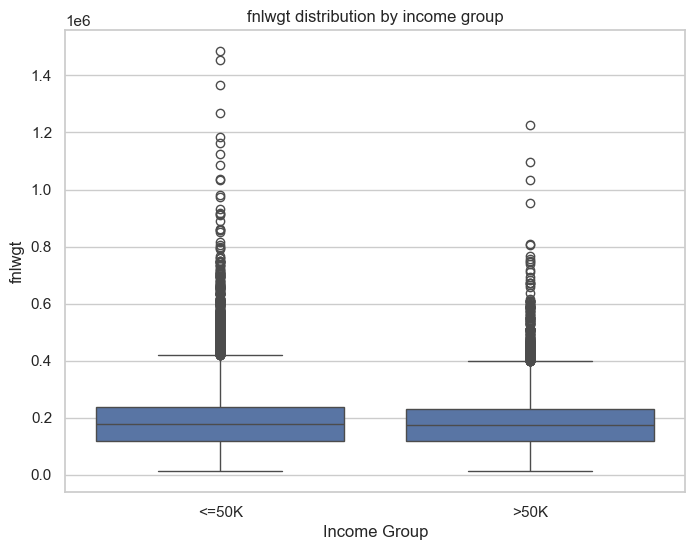

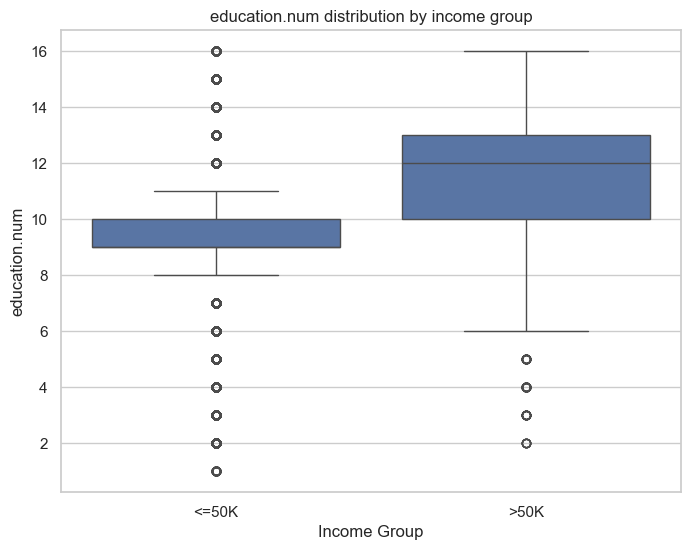

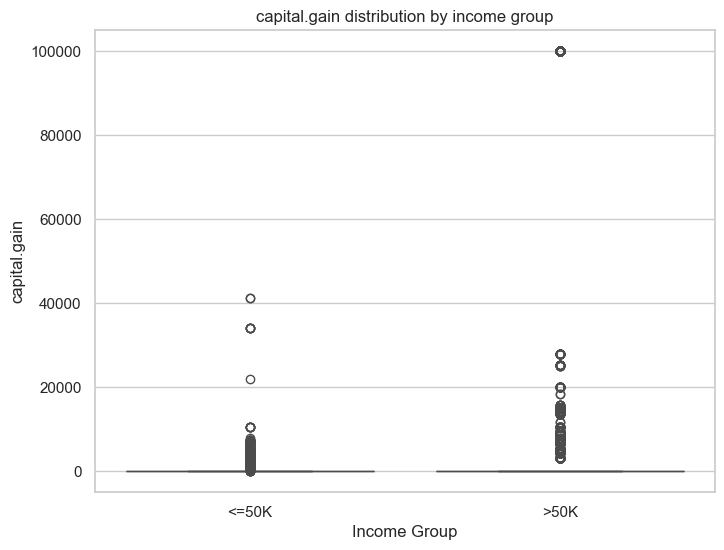

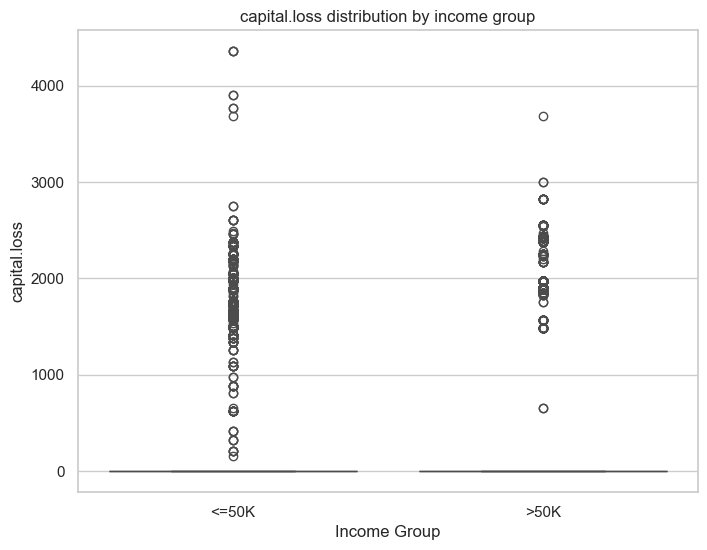

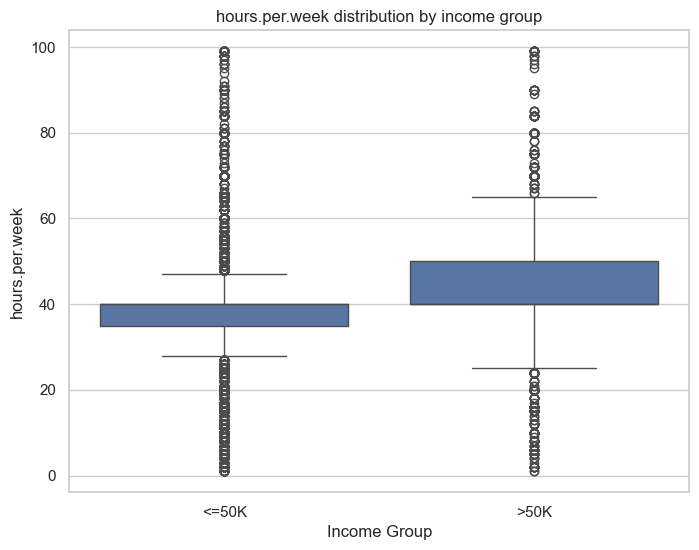

In [267]:
for col in num_col:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, x='income', y=col)
    plt.title(f'{col} distribution by income group')
    plt.xlabel('Income Group')
    plt.ylabel(col)
    plt.show()

In [268]:
def outlier_iqr(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return column[(column < lower_bound) | (column > upper_bound)].reset_index(drop=False)


In [269]:
num_col

['age',
 'fnlwgt',
 'education.num',
 'capital.gain',
 'capital.loss',
 'hours.per.week']

In [270]:
outlier_iqr(df['age'])

,index,age
0,0,90
1,1,82
2,118,83
3,128,81
4,199,90
...,...,...
138,31939,82
139,32305,90
140,32468,85
141,32500,82


### Capping Outliers

In [271]:
def cap_outliers_IQR(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[column] = np.where(df[column] < lower_bound, lower_bound, np.where(df[column] > upper_bound, upper_bound, df[column]))
    return df

In [272]:
for col in num_col:
    df_capped = cap_outliers_IQR(df, col)

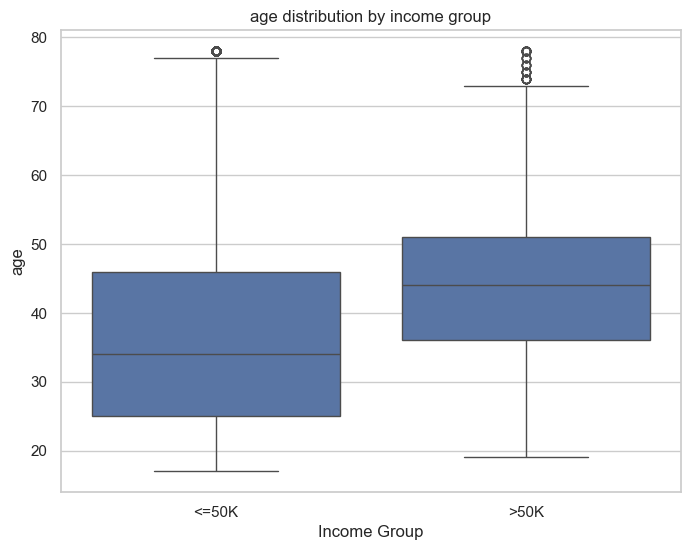

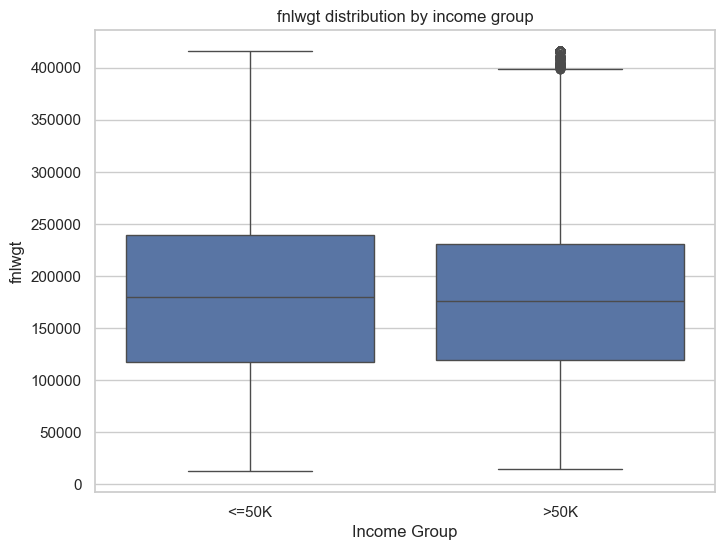

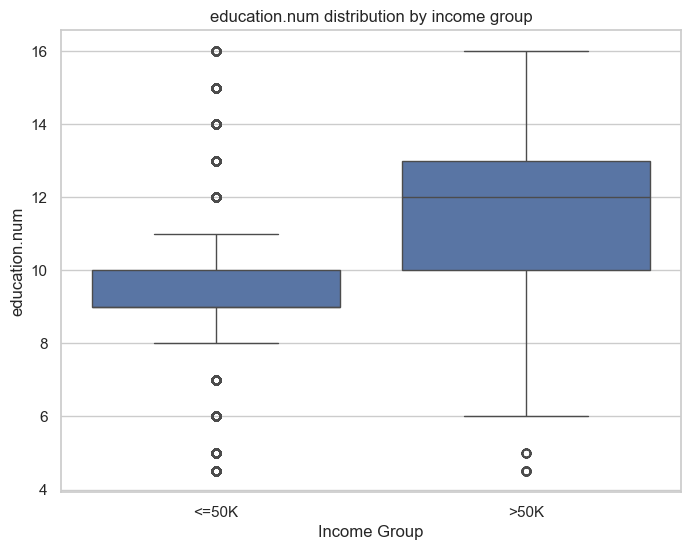

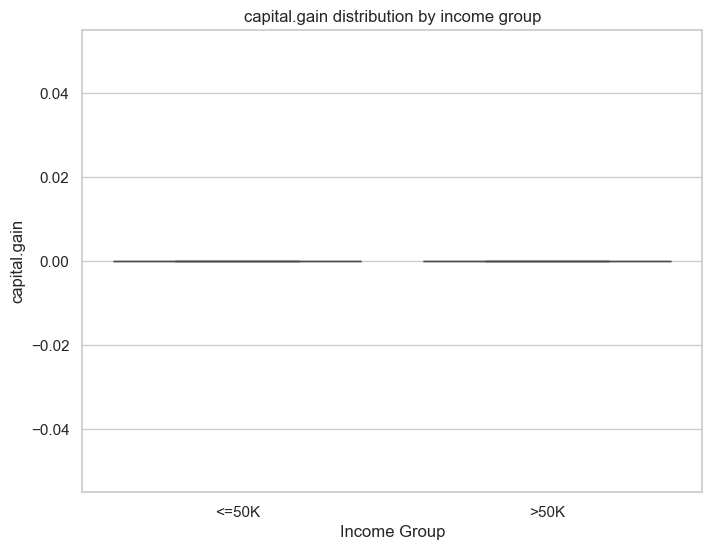

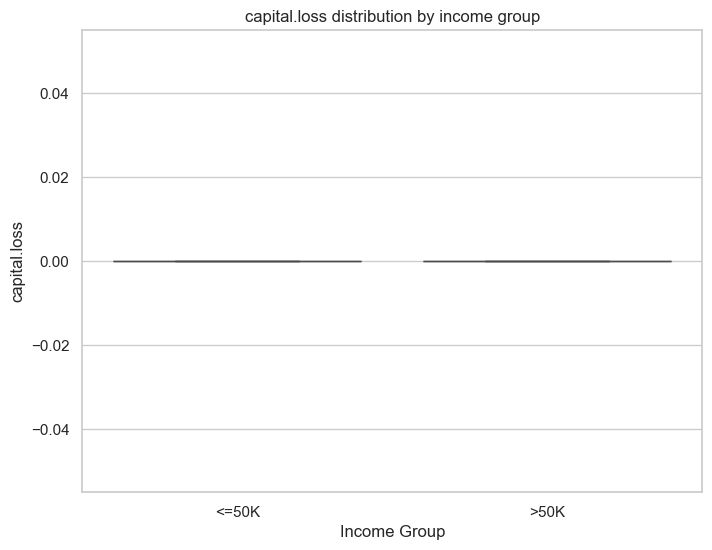

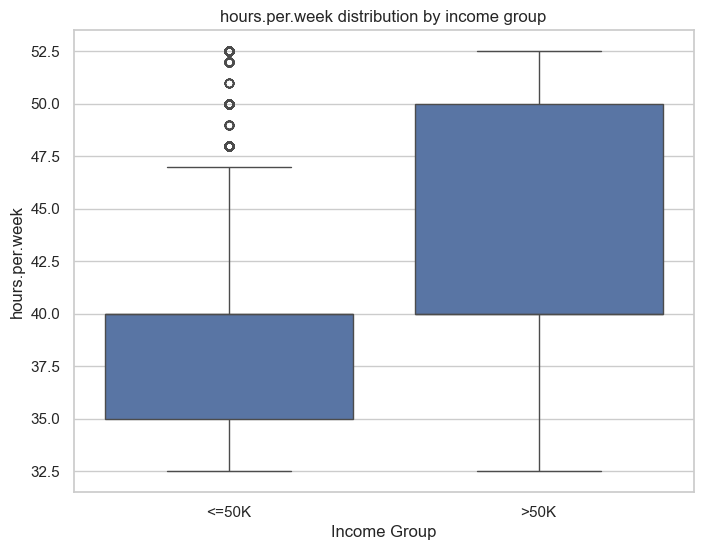

In [273]:
for col in num_col:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df_capped, x='income', y=col)
    plt.title(f'{col} distribution by income group')
    plt.xlabel('Income Group')
    plt.ylabel(col)
    plt.show()

### Imputing Outliers

In [274]:
def impute_outliers_IQR(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    median = df[column].median()
    df[column] = np.where((df[column] < lower) | (df[column] > upper), median, df[column])
    return df


In [275]:
for col in num_col:
    df_imputed = impute_outliers_IQR(df, col)

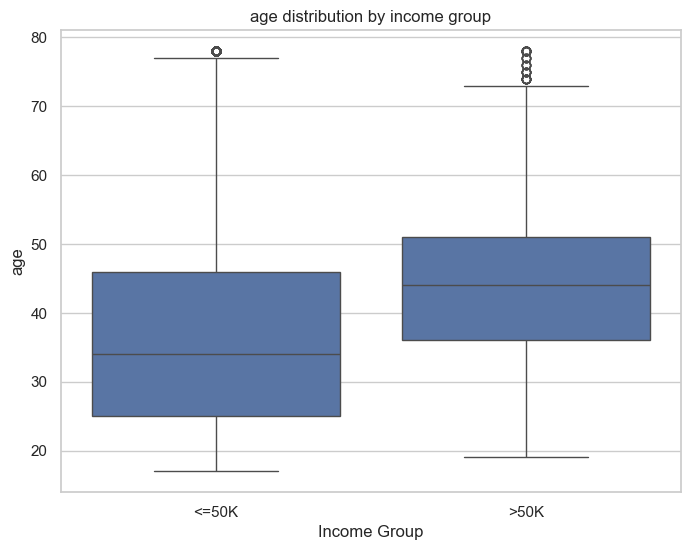

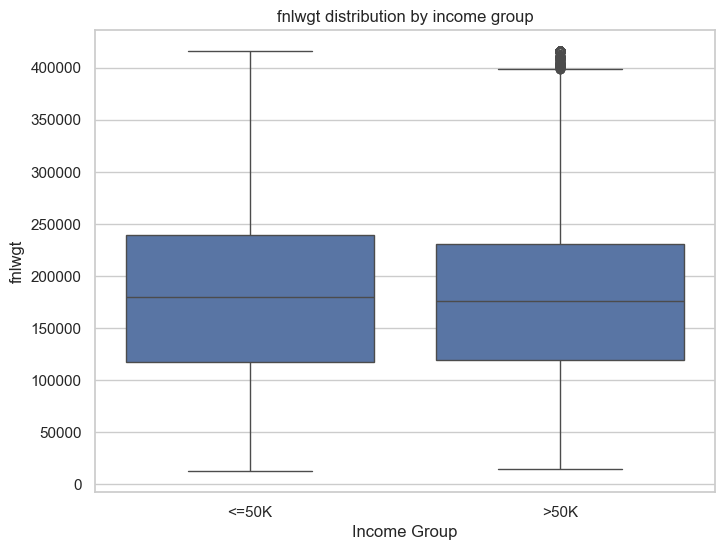

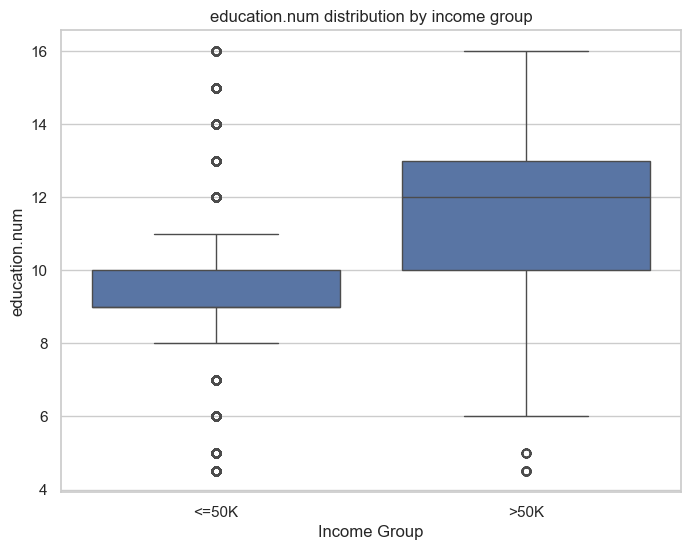

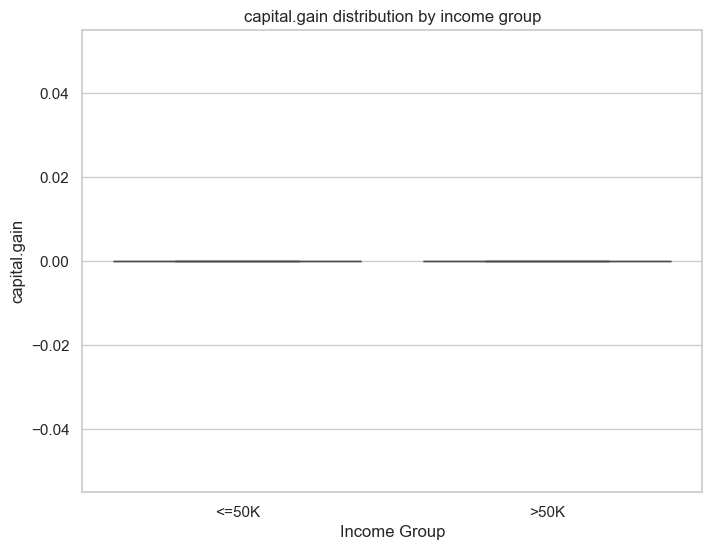

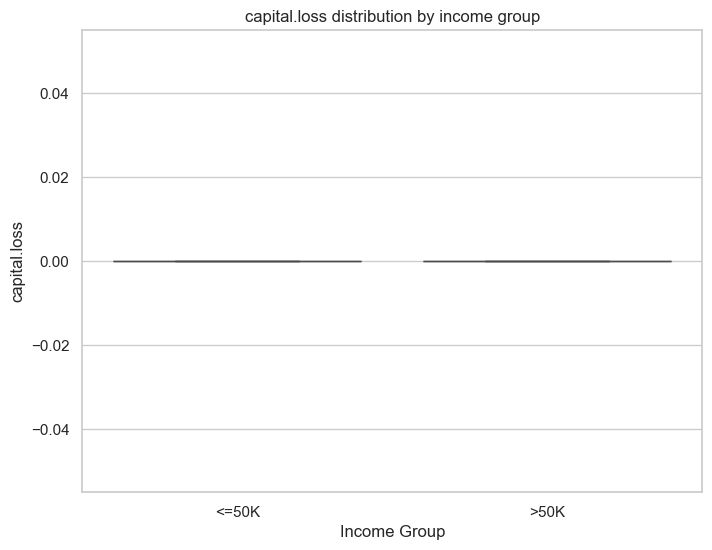

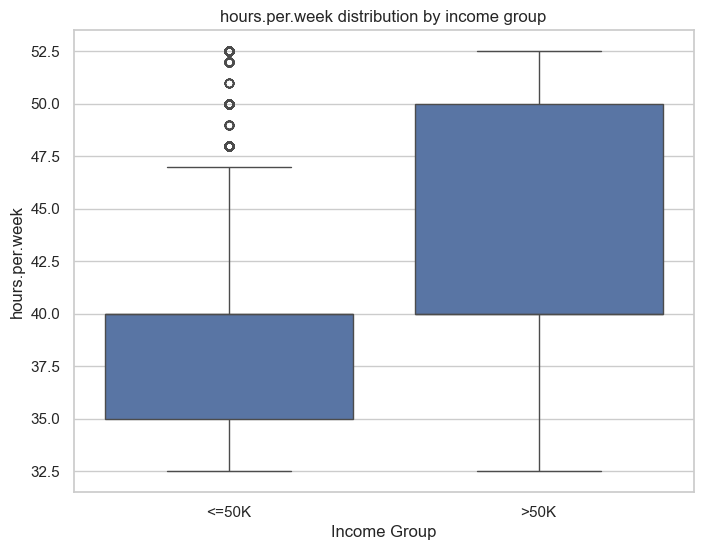

In [276]:
for col in num_col:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df_imputed, x='income', y=col)
    plt.title(f'{col} distribution by income group')
    plt.xlabel('Income Group')
    plt.ylabel(col)
    plt.show()

### Removing Outliers

In [277]:
def remove_outliers_IQR(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] >= lower) & (df[column] <= upper)]


In [278]:
for col in num_col:
    df_removed = remove_outliers_IQR(df, col)

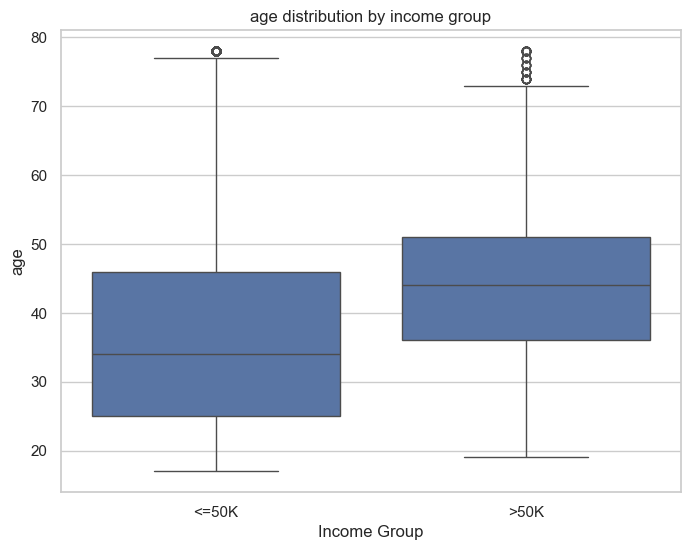

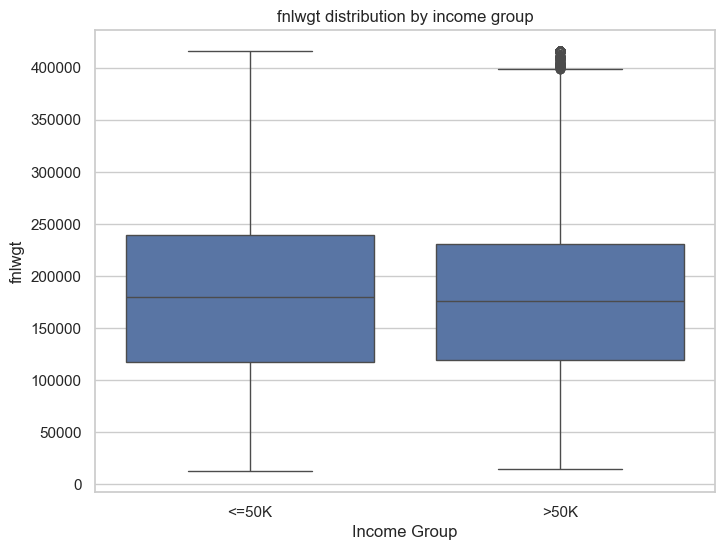

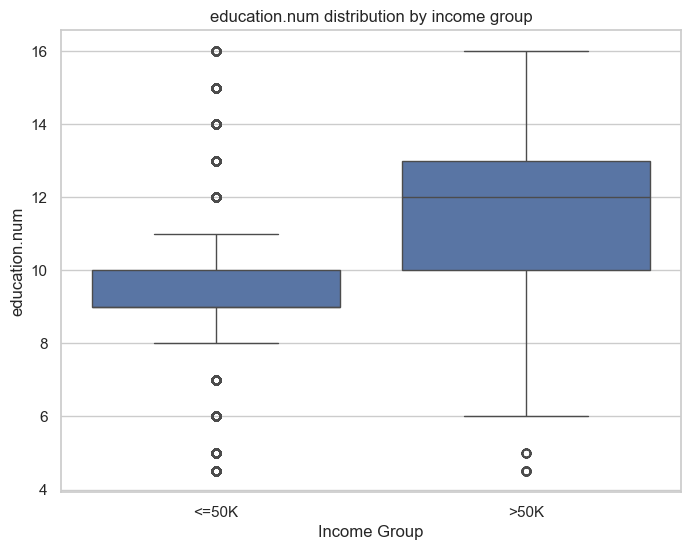

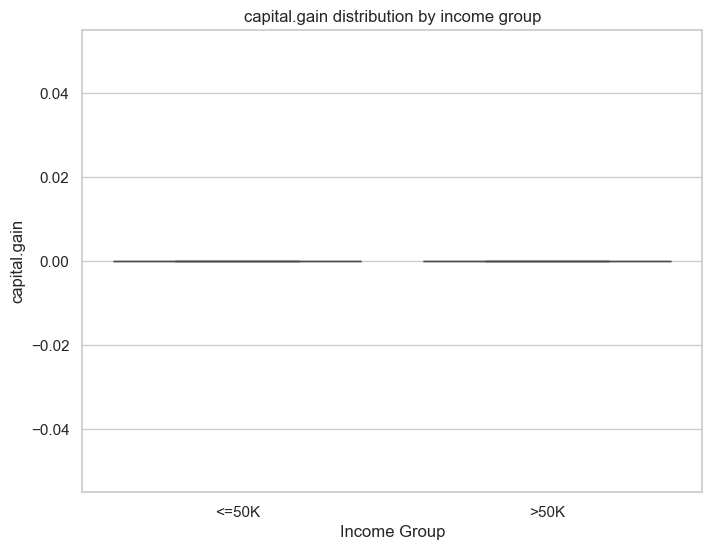

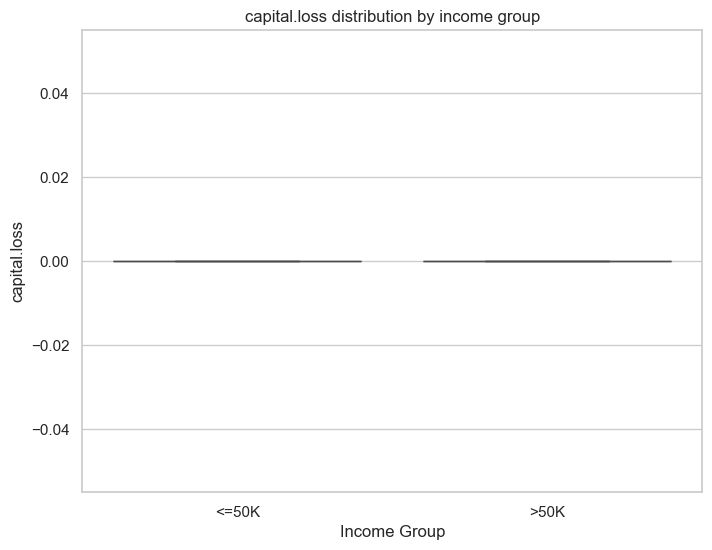

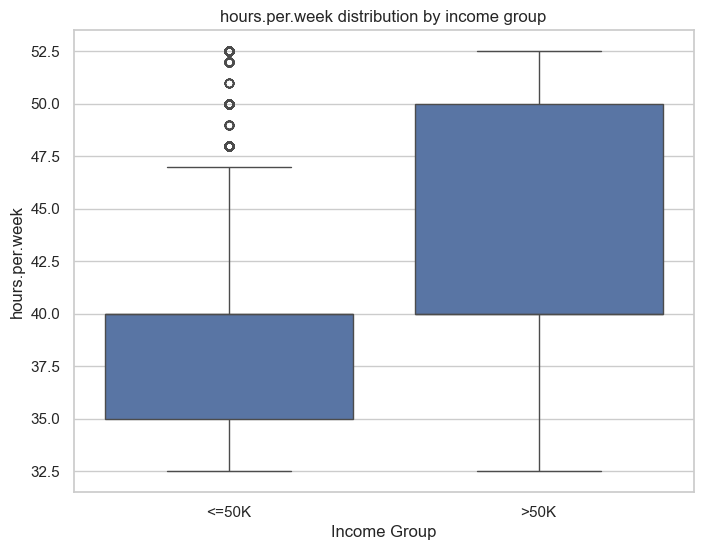

In [279]:
for col in num_col:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df_capped, x='income', y=col)
    plt.title(f'{col} distribution by income group')
    plt.xlabel('Income Group')
    plt.ylabel(col)
    plt.show()